In [2]:
import pandas as pd

In [11]:
# Load the CSV files into DataFrames
df1 = pd.read_csv('dataset/lower_income1.csv')
df2 = pd.read_csv('dataset/upper_income1.csv')

print("Lower income csv columns:", df1.columns)
print("Upper income csv columns:", df2.columns)

Lower income csv columns: Index(['Amount', 'Category', 'Type', 'Date'], dtype='object')
Upper income csv columns: Index(['Date', 'Category', 'Amount', 'Type'], dtype='object')


In [12]:
# Convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Extract month and year
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year

In [13]:
# Group by month and category
monthly_spending_lower = df1.groupby(['Year', 'Month', 'Category'])['Amount'].sum().reset_index()
monthly_spending_upper = df2.groupby(['Year', 'Month', 'Category'])['Amount'].sum().reset_index()

In [14]:
# Add total monthly spending for normalization
monthly_spending_lower['Total_Monthly_Spend'] = monthly_spending_lower.groupby(['Year', 'Month'])['Amount'].transform('sum')
monthly_spending_upper['Total_Monthly_Spend'] = monthly_spending_upper.groupby(['Year', 'Month'])['Amount'].transform('sum')

In [15]:
# Calculate percentage of spending per category
monthly_spending_lower['Percent_Spend'] = (monthly_spending_lower['Amount'] / monthly_spending_lower['Total_Monthly_Spend']) * 100
monthly_spending_upper['Percent_Spend'] = (monthly_spending_upper['Amount'] / monthly_spending_upper['Total_Monthly_Spend']) * 100

In [16]:
print("Lower:")
print(monthly_spending_lower.head())

Lower:
   Year  Month  ... Total_Monthly_Spend  Percent_Spend
0  2021     11  ...        98669.891969       1.589137
1  2021     11  ...        98669.891969       2.802008
2  2021     11  ...        98669.891969      17.583885
3  2021     11  ...        98669.891969       3.243137
4  2021     11  ...        98669.891969      28.486689

[5 rows x 6 columns]


In [17]:
print("Upper:")
print(monthly_spending_upper.head())

Upper:
   Year  Month          Category     Amount  Total_Monthly_Spend  Percent_Spend
0  2020      1            Beauty  1475.5800           24566.3225       6.006516
1  2020      1     Entertainment  4308.4125           24566.3225      17.537881
2  2020      1              Food  5458.5100           24566.3225      22.219484
3  2020      1  Health & Fitness  2370.3400           24566.3225       9.648738
4  2020      1         Household  3663.2200           24566.3225      14.911552


In [18]:
baseline_lower = {
    'Household': 30,
    'Food': 40,
    'Shopping': 7,
    'Transportation':5,
    'Health & Fitness': 5,
    'Entertainment': 5,
    'Beauty': 4,
    'Investment': 4
}


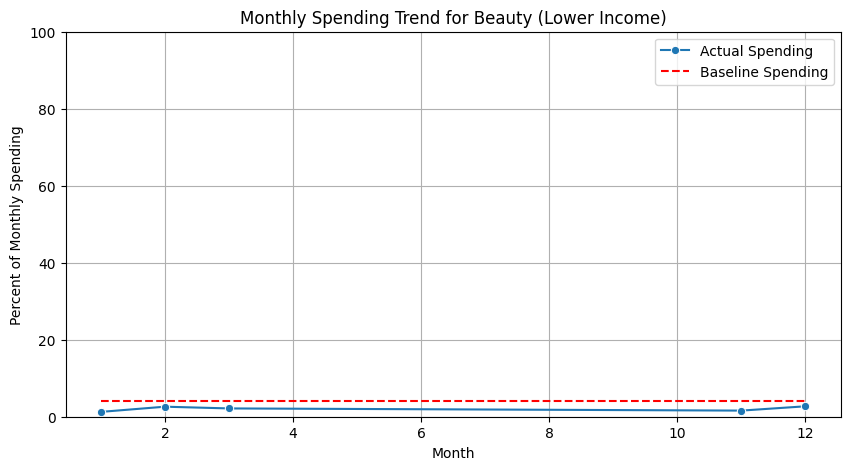

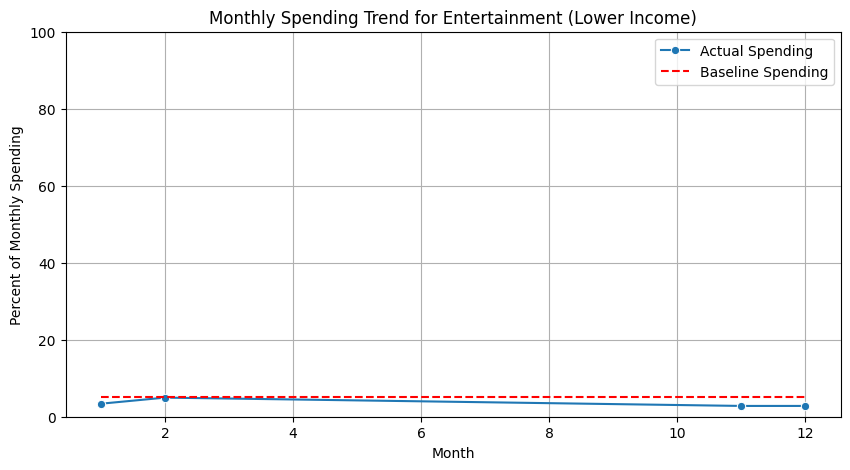

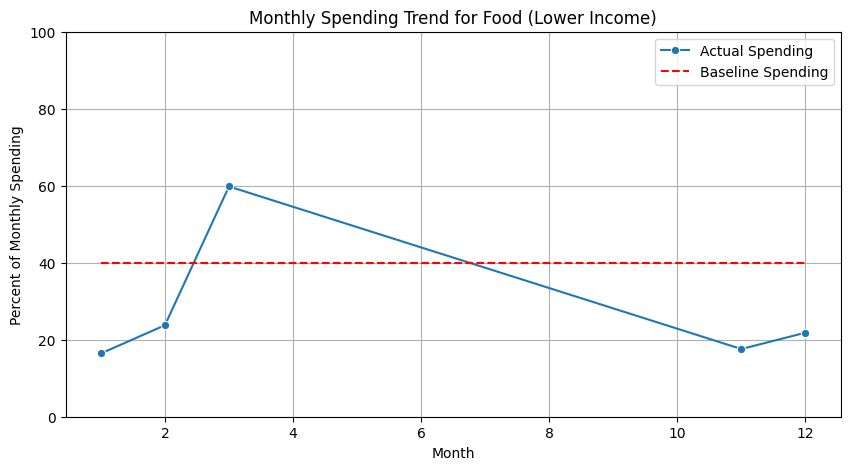

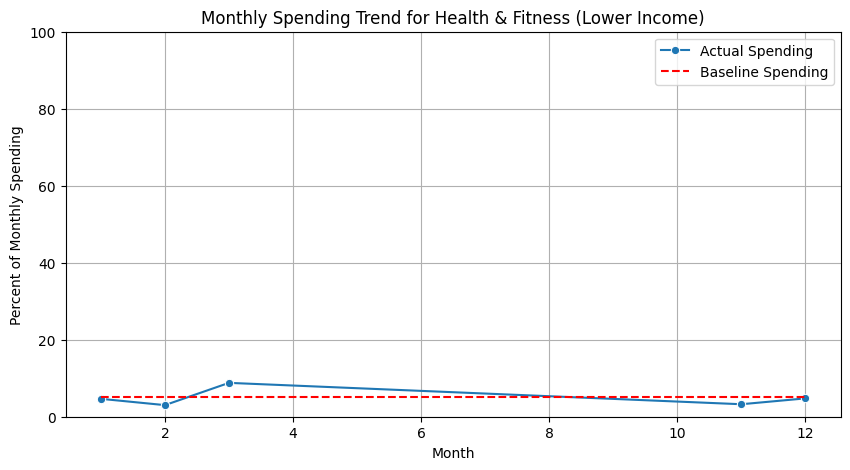

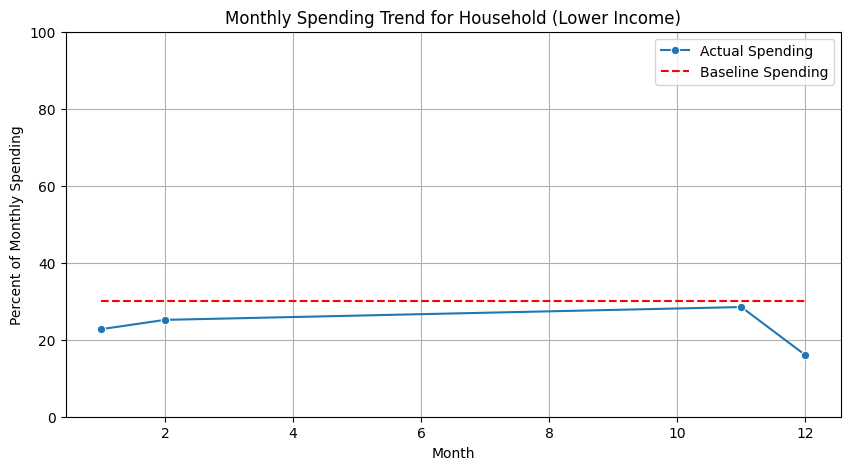

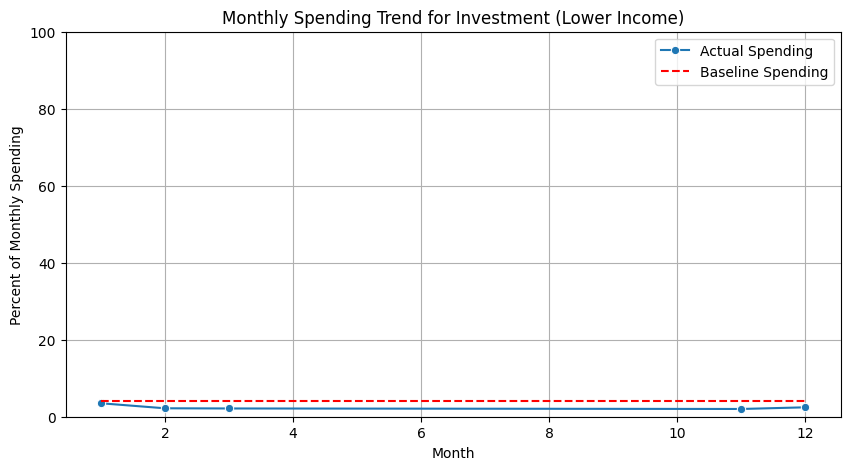

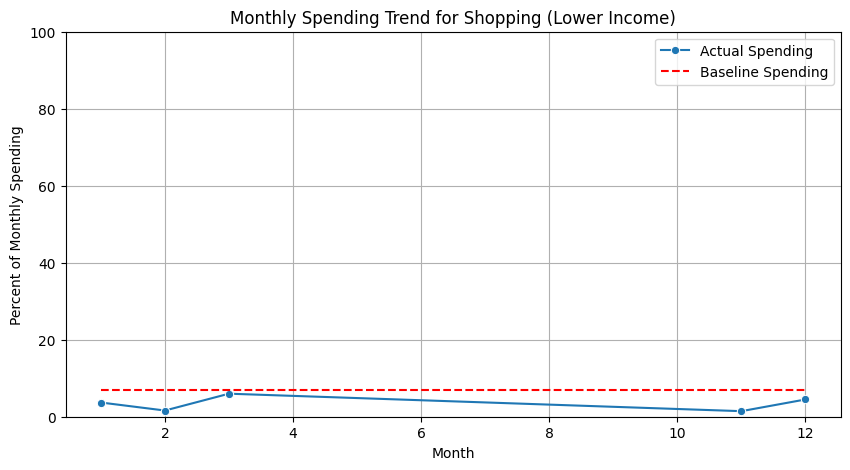

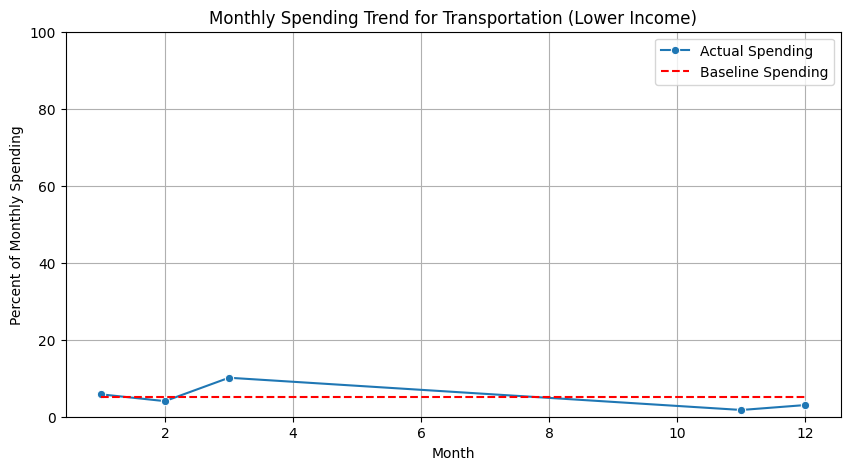

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract unique categories
categories = monthly_spending_lower['Category'].unique()

# Create a separate plot for each category
for category in categories:
    # Filter data for the current category
    if category!='Salary':
        category_data = monthly_spending_lower[monthly_spending_lower['Category'] == category]
        
        # Create a baseline DataFrame for the category
        baseline_data = pd.DataFrame({
            'Month': category_data['Month'].unique(),
            'Baseline': [baseline_lower.get(category, 0)] * len(category_data['Month'].unique())
        })
        
        # Plot the data
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=category_data, x='Month', y='Percent_Spend', label='Actual Spending', marker='o')
        sns.lineplot(data=baseline_data, x='Month', y='Baseline', label='Baseline Spending', linestyle='--', color='red')
        plt.title(f'Monthly Spending Trend for {category} (Lower Income)')
        plt.ylabel('Percent of Monthly Spending')
        plt.xlabel('Month')
        plt.ylim(0, 100)  # Ensure the y-axis has the same scale for all charts
        plt.legend()
        plt.grid(True)
        plt.show()


In [20]:
# Loop through each category and print the actual spending percentages
for category in categories:
    # Filter data for the current category
    category_data = monthly_spending_lower[monthly_spending_lower['Category'] == category]
    
    print(f"Actual Spending for {category}:")
    print(category_data[['Month', 'Percent_Spend']])
    print("-" * 50)
    
    # Print the baseline for comparison
    baseline_value = baseline_lower.get(category, 0)
    print(f"Baseline Spending for {category}: {baseline_value}%\n")
    print("=" * 50)

Actual Spending for Beauty:
    Month  Percent_Spend
0      11       1.589137
9      12       2.707200
18      1       1.256762
27      2       2.604319
36      3       2.154803
--------------------------------------------------
Baseline Spending for Beauty: 4%

Actual Spending for Entertainment:
    Month  Percent_Spend
1      11       2.802008
10     12       2.802266
19      1       3.380036
28      2       4.961147
--------------------------------------------------
Baseline Spending for Entertainment: 5%

Actual Spending for Food:
    Month  Percent_Spend
2      11      17.583885
11     12      21.826232
20      1      16.429081
29      2      23.760541
37      3      59.806775
--------------------------------------------------
Baseline Spending for Food: 40%

Actual Spending for Health & Fitness:
    Month  Percent_Spend
3      11       3.243137
12     12       4.762844
21      1       4.648738
30      2       3.011797
38      3       8.795114
-------------------------------------

In [21]:
def compare_to_baseline(row, baseline):
    category = row['Category']
    actual = row['Percent_Spend']
    expected = baseline.get(category, 0)
    deviation = actual - expected
    return deviation  # Positive = overspending, Negative = underspending

monthly_spending_lower['Deviation'] = monthly_spending_lower.apply(compare_to_baseline, axis=1, baseline=baseline_lower)

In [22]:
# Filter out "Salary"
filtered_data = monthly_spending_lower[monthly_spending_lower['Category'] != 'Salary']

# Display the deviations for each category
for category in filtered_data['Category'].unique():
    category_data = filtered_data[filtered_data['Category'] == category]
    print(f"Deviation for {category}:")
    print(category_data[['Month', 'Percent_Spend', 'Deviation']])
    print("-" * 50)


Deviation for Beauty:
    Month  Percent_Spend  Deviation
0      11       1.589137  -2.410863
9      12       2.707200  -1.292800
18      1       1.256762  -2.743238
27      2       2.604319  -1.395681
36      3       2.154803  -1.845197
--------------------------------------------------
Deviation for Entertainment:
    Month  Percent_Spend  Deviation
1      11       2.802008  -2.197992
10     12       2.802266  -2.197734
19      1       3.380036  -1.619964
28      2       4.961147  -0.038853
--------------------------------------------------
Deviation for Food:
    Month  Percent_Spend  Deviation
2      11      17.583885 -22.416115
11     12      21.826232 -18.173768
20      1      16.429081 -23.570919
29      2      23.760541 -16.239459
37      3      59.806775  19.806775
--------------------------------------------------
Deviation for Health & Fitness:
    Month  Percent_Spend  Deviation
3      11       3.243137  -1.756863
12     12       4.762844  -0.237156
21      1       4.648738

In [23]:
baseline_upper = {
    'Household': 11,
    'Food': 10,
    'Shopping': 13,
    'Transportation':11,
    'Health & Fitness': 10,
    'Entertainment': 18,
    'Beauty': 8,
    'Investment': 19
}

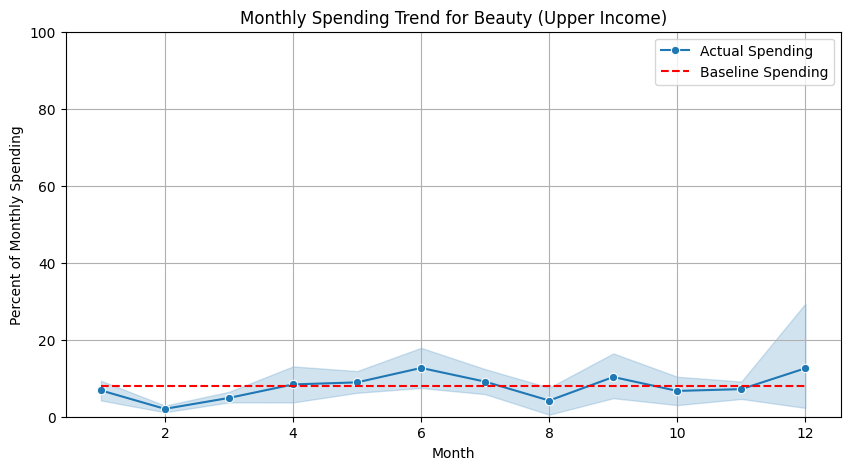

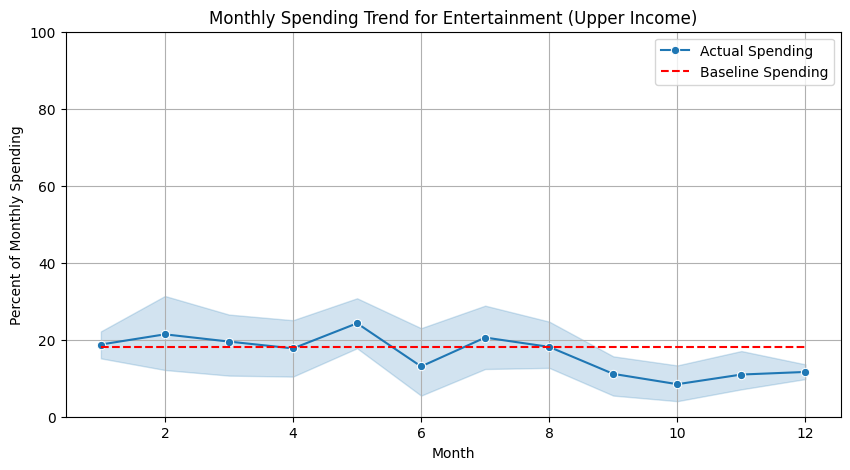

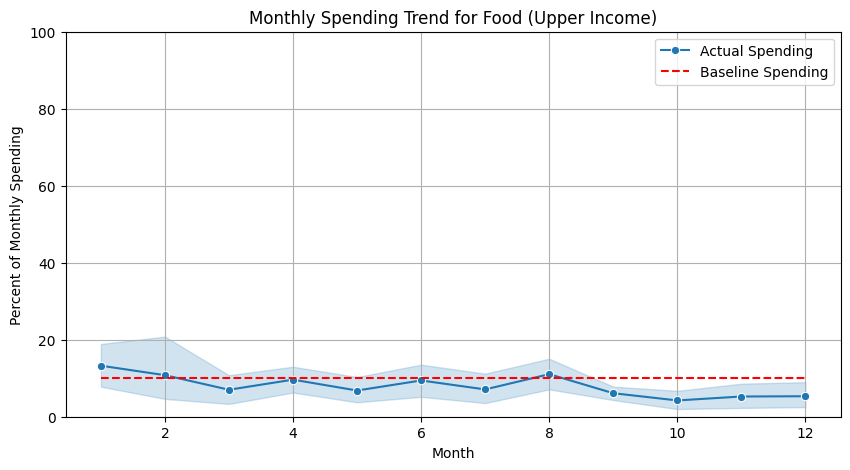

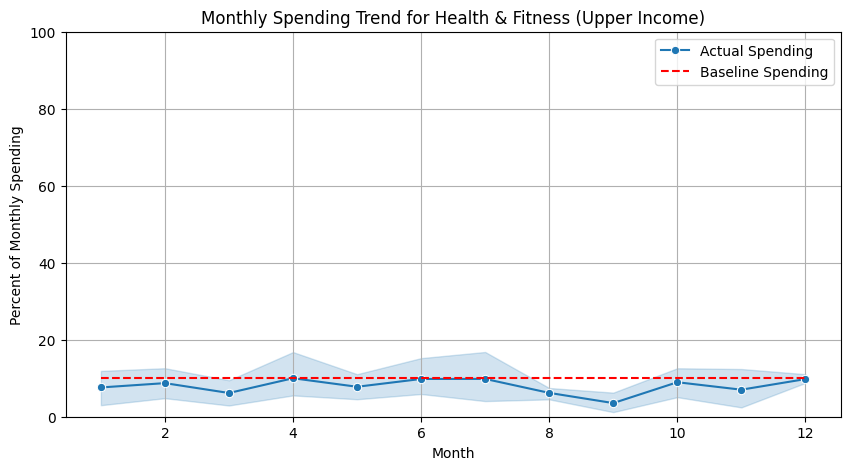

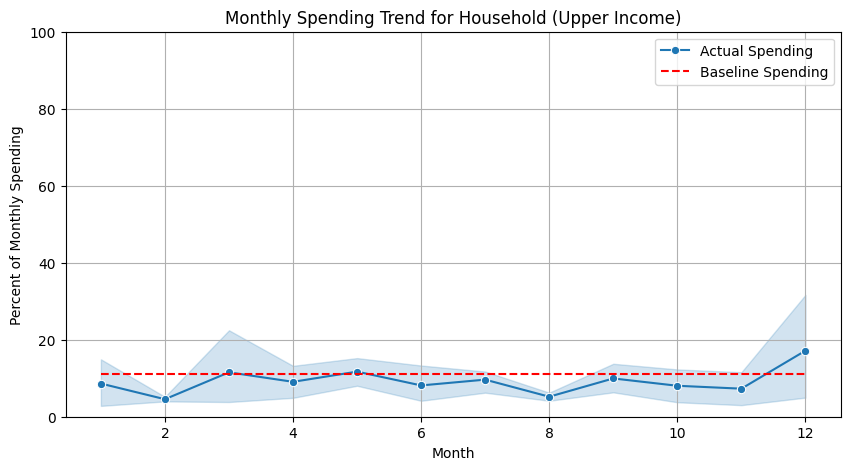

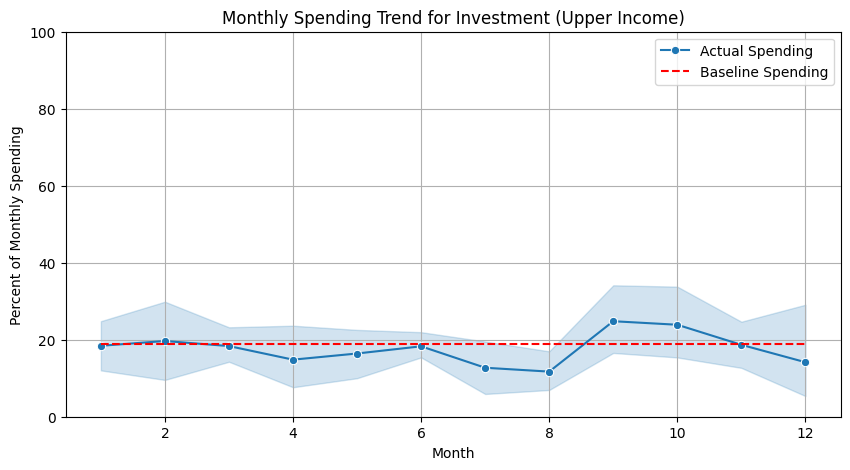

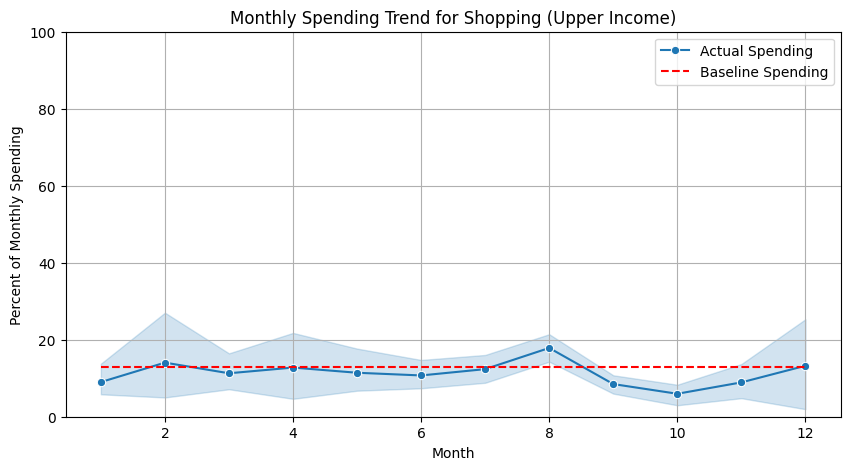

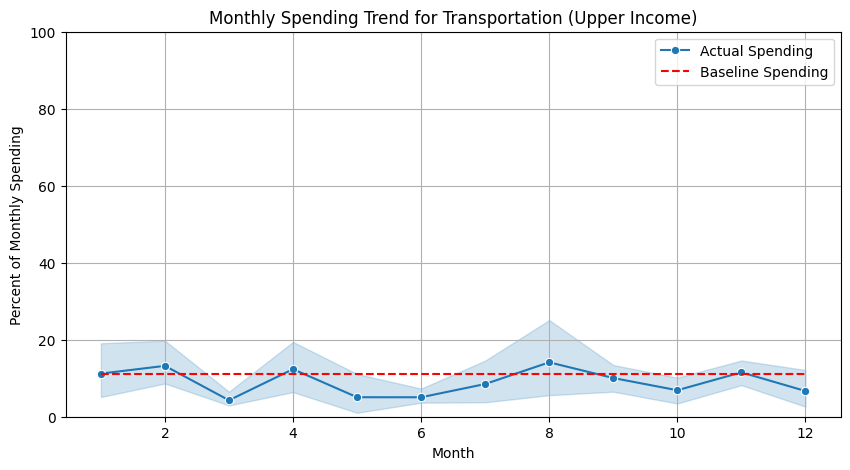

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract unique categories
categories = monthly_spending_upper['Category'].unique()

# Create a separate plot for each category
for category in categories:
    # Filter data for the current category
    if category!='Salary':
        category_data = monthly_spending_upper[monthly_spending_upper['Category'] == category]
        
        # Create a baseline DataFrame for the category
        baseline_data = pd.DataFrame({
            'Month': category_data['Month'].unique(),
            'Baseline': [baseline_upper.get(category, 0)] * len(category_data['Month'].unique())
        })
        
        # Plot the data
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=category_data, x='Month', y='Percent_Spend', label='Actual Spending', marker='o')
        sns.lineplot(data=baseline_data, x='Month', y='Baseline', label='Baseline Spending', linestyle='--', color='red')
        plt.title(f'Monthly Spending Trend for {category} (Upper Income)')
        plt.ylabel('Percent of Monthly Spending')
        plt.xlabel('Month')
        plt.ylim(0, 100)  # Ensure the y-axis has the same scale for all charts
        plt.legend()
        plt.grid(True)
        plt.show()


In [ ]:
monthly_spending_upper['Deviation'] = monthly_spending_upper.apply(compare_to_baseline, axis=1, baseline=baseline_upper)

# Filter out "Salary"
filtered_data = monthly_spending_upper[monthly_spending_upper['Category'] != 'Salary']

# Display the deviations for each category
for category in filtered_data['Category'].unique():
    category_data = filtered_data[filtered_data['Category'] == category]
    print(f"Deviation for {category}:")
    print(category_data[['Month', 'Percent_Spend', 'Deviation']])
    print("-" * 50)

Deviation for Beauty:
     Month  Percent_Spend  Deviation
0        1       6.006516  -1.993484
8        2       3.454618  -4.545382
17       3       4.162536  -3.837464
25       4      10.342255   2.342255
33       5       7.054072  -0.945928
41       6      17.064460   9.064460
49       7       8.954344   0.954344
57       8       7.546870  -0.453130
66       9       2.864479  -5.135521
74      10       3.406500  -4.593500
83      11       9.504101   1.504101
92      12       6.196214  -1.803786
100      1       9.877550   1.877550
107      2       2.774663  -5.225337
115      3       7.961128  -0.038872
124      4      10.735403   2.735403
133      5       8.085063   0.085063
142      6      18.710269  10.710269
150      7      13.654298   5.654298
157      8       0.530150  -7.469850
165      9      13.506764   5.506764
173     10      12.496584   4.496584
180     11       9.352722   1.352722
189     12       5.948152  -2.051848
196      1       4.654207  -3.345793
204      2      

In [26]:
# Define the thresholds for deviation
threshold = 5  # Define the threshold for acceptable deviation, e.g., 5%

# Function to label as 'Good' or 'Bad' based on deviation
def label_spending(row, threshold):
    if abs(row['Deviation']) > threshold:
        return 'Bad'
    else:
        return 'Good'

In [27]:
# Apply the label_spending function to both lower and upper income datasets
monthly_spending_lower['Label'] = monthly_spending_lower.apply(label_spending, axis=1, threshold=threshold)
monthly_spending_upper['Label'] = monthly_spending_upper.apply(label_spending, axis=1, threshold=threshold)

# Save the labeled data back to CSV
monthly_spending_lower.to_csv('dataset/monthly_spending_lower_labeled.csv', index=False)
monthly_spending_upper.to_csv('dataset/monthly_spending_upper_labeled.csv', index=False)

# Display the labeled data (Optional)
print("Lower Income Monthly Spending with Labels:")
print(monthly_spending_lower[['Month', 'Category', 'Percent_Spend', 'Deviation', 'Label']])

print("\nUpper Income Monthly Spending with Labels:")
print(monthly_spending_upper[['Month', 'Category', 'Percent_Spend', 'Deviation', 'Label']])

Lower Income Monthly Spending with Labels:
    Month          Category  Percent_Spend  Deviation Label
0      11            Beauty       1.589137  -2.410863  Good
1      11     Entertainment       2.802008  -2.197992  Good
2      11              Food      17.583885 -22.416115   Bad
3      11  Health & Fitness       3.243137  -1.756863  Good
4      11         Household      28.486689  -1.513311  Good
5      11        Investment       2.013177  -1.986823  Good
6      11            Salary      41.088147  41.088147   Bad
7      11          Shopping       1.441711  -5.558289   Bad
8      11    Transportation       1.752108  -3.247892  Good
9      12            Beauty       2.707200  -1.292800  Good
10     12     Entertainment       2.802266  -2.197734  Good
11     12              Food      21.826232 -18.173768   Bad
12     12  Health & Fitness       4.762844  -0.237156  Good
13     12         Household      15.981182 -14.018818   Bad
14     12        Investment       2.443339  -1.556661  Go

In [30]:
print("Upper months: ",monthly_spending_upper['Month'].unique())
print("Upper years: ",monthly_spending_upper['Year'].unique())
print("Lower months: ",monthly_spending_lower['Month'].unique())

Upper months:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Upper years:  [2020 2021 2022 2023 2024]
Lower months:  [11 12  1  2  3]


## Models

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier

In [4]:
monthly_spending_lower = pd.read_csv('dataset/monthly_spending_lower_labeled.csv')
monthly_spending_upper = pd.read_csv('dataset/monthly_spending_upper_labeled.csv')

In [30]:
#Decision Tree
# Load the data
# Assuming monthly_spending_lower is your dataset
df = monthly_spending_lower.copy()

# Encode the Label column (Good = 1, Bad = 0)
df['Label'] = df['Label'].map({'Good': 1, 'Bad': 0})

# One-hot encode the Category column
df_encoded = pd.get_dummies(df, columns=['Category'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Label', 'Month'])  # Drop Label and Month for training
y = df_encoded['Label']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set
dt_predictions = dt_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.83      0.91         6

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9

Decision Tree Accuracy: 0.8888888888888888


In [31]:
# Define parameter distribution for Decision Tree
param_dist_tree = {
    'max_depth': randint(10, 50),  # Depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Initialize RandomizedSearchCV for Decision Tree
random_search_tree = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_tree,
    n_iter=50,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Perform random search
random_search_tree.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
print("Best Hyperparameters (Decision Tree):", random_search_tree.best_params_)

# Best cross-validation score
print("Best Cross-Validation Score (Decision Tree):", random_search_tree.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=gini, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=28, max_features=None, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=28, max_features=None, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=33, max_features=None, min_samples_leaf=6, min_samples_split=3; total time=   0.0s[CV] END criterion=entropy, max_depth=33, max_features=None, min_samples_leaf=6, min_samples_split=3; total time=   0.0s

[CV] END criterion=entropy, max_depth=33, max_features=None, min_samples_leaf=6, min_samples_split=3

In [48]:
# Train the Decision Tree model with best hyperparameters
optimised_dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=38,
    max_features=None,
    min_samples_split=8,
    random_state=42
)

# Train the model
optimised_dt_model.fit(X_train, y_train)

# Predict on the test set
optimized_dt_predictions = optimised_dt_model.predict(X_test)

# Evaluate the optimized model
print("\nOptimized Decision Tree Classification Report:")
print(classification_report(y_test, optimized_dt_predictions))
print("Optimized Decision Tree Accuracy:", accuracy_score(y_test, optimized_dt_predictions))



Optimized Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.83      0.91         6

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9

Optimized Decision Tree Accuracy: 0.8888888888888888


In [49]:
# Example of D-Tree
input_data = {
    'Entertainment': 500,
    'Food': 1600,
    'Beauty': 600,
    'Health & Fitness': 200,
    'Household': 800,
    'Investment': 0
}

# Total spending
total_spending = sum(input_data.values())

# Baseline thresholds (as percentages)
baseline_lower = {
    'Household': 30,
    'Food': 40,
    'Health & Fitness': 5,
    'Entertainment': 5,
    'Beauty': 4,
    'Investment': 4
}

# Convert raw spending to percentage of total spending
percent_spend = {k: (v / total_spending) * 100 for k, v in input_data.items()}

# Align categories with baseline order
percent_spend = {category: percent_spend[category] for category in baseline_lower.keys()}

# Calculate deviations
deviations = {category: percent_spend[category] - baseline_lower[category] for category in baseline_lower.keys()}

# Prepare data for prediction
rows = []
for category in baseline_lower.keys():
    row = {
        'Percent_Spend': percent_spend[category],
        'Deviation': deviations[category],
        **{f'Category_{cat}': 1 if cat == category else 0 for cat in baseline_lower.keys()}
    }
    rows.append(row)

# Convert to DataFrame
new_df = pd.DataFrame(rows)

# Align with training feature columns
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)

# Predict for each category
predictions = optimised_dt_model.predict(new_df)

# Add predictions to the result
new_df['Category'] = baseline_lower.keys()
new_df['Prediction'] = ['Good' if pred == 1 else 'Bad' for pred in predictions]

# Display results
print(new_df[['Category', 'Percent_Spend', 'Deviation', 'Prediction']])


           Category  Percent_Spend  Deviation Prediction
0         Household      21.621622  -8.378378        Bad
1              Food      43.243243   3.243243        Bad
2  Health & Fitness       5.405405   0.405405       Good
3     Entertainment      13.513514   8.513514        Bad
4            Beauty      16.216216  12.216216        Bad
5        Investment       0.000000  -4.000000       Good


In [33]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.83      0.83      0.83         6

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9

Random Forest Accuracy: 0.7777777777777778


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Perform random search
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Best score
print("Best Cross-Validation Score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   0.6s
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   0.6s
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   0.7s
[CV] END bootstrap=True, max_depth=32, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=153; total time=   0.6s
[CV] END bootstrap=True, max_depth=32, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=153; total time=   0.6s
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   0.7s
[CV] END bootstrap=True, max_depth=32, max_features=None, min_samples_leaf=8, min_samples_split=5, n_estimators=153; total

In [35]:
# Train the Random Forest model with best hyperparameters
optimized_rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=38,
    max_features=None,
    min_samples_leaf=8,
    min_samples_split=8,
    n_estimators=171,
    random_state=42
)

# Train the model
optimized_rf_model.fit(X_train, y_train)

# Predict on the test set
optimized_rf_predictions = optimized_rf_model.predict(X_test)

# Evaluate the optimized model
print("\nOptimized Random Forest Classification Report:")
print(classification_report(y_test, optimized_rf_predictions))
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, optimized_rf_predictions))



Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.83      0.83      0.83         6

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9

Optimized Random Forest Accuracy: 0.7777777777777778


In [37]:
# Example of Random-Forest
input_data = {
    'Entertainment': 500,
    'Food': 1600,
    'Beauty': 600,
    'Health & Fitness': 200,
    'Household': 800,
    'Investment': 0
}

# Total spending
total_spending = sum(input_data.values())

# Baseline thresholds (as percentages)
baseline_lower = {
    'Household': 30,
    'Food': 40,
    'Health & Fitness': 5,
    'Entertainment': 5,
    'Beauty': 4,
    'Investment': 4
}

# Convert raw spending to percentage of total spending
percent_spend = {k: (v / total_spending) * 100 for k, v in input_data.items()}

# Align categories with baseline order
percent_spend = {category: percent_spend[category] for category in baseline_lower.keys()}

# Calculate deviations
deviations = {category: percent_spend[category] - baseline_lower[category] for category in baseline_lower.keys()}

# Prepare data for prediction
rows = []
for category in baseline_lower.keys():
    row = {
        'Percent_Spend': percent_spend[category],
        'Deviation': deviations[category],
        **{f'Category_{cat}': 1 if cat == category else 0 for cat in baseline_lower.keys()}
    }
    rows.append(row)

# Convert to DataFrame
new_df = pd.DataFrame(rows)

# Align with training feature columns
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)

# Predict for each category
predictions = rf_model.predict(new_df)

# Add predictions to the result
new_df['Category'] = baseline_lower.keys()
new_df['Prediction'] = ['Good' if pred == 1 else 'Bad' for pred in predictions]

# Display results
print(new_df[['Category', 'Percent_Spend', 'Deviation', 'Prediction']])


           Category  Percent_Spend  Deviation Prediction
0         Household      21.621622  -8.378378        Bad
1              Food      43.243243   3.243243        Bad
2  Health & Fitness       5.405405   0.405405       Good
3     Entertainment      13.513514   8.513514        Bad
4            Beauty      16.216216  12.216216        Bad
5        Investment       0.000000  -4.000000       Good


In [ ]:
#XG-Boost Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for XGBoost
param_dist_xgb = {
    'n_estimators': randint(50, 300),            # Number of trees
    'max_depth': randint(3, 15),                 # Maximum depth of trees
    'learning_rate': uniform(0.01, 0.3),         # Learning rate (shrinkage)
    'subsample': uniform(0.5, 0.5),              # Subsample ratio of training samples
    'colsample_bytree': uniform(0.5, 0.5),       # Subsample ratio of columns
    'min_child_weight': randint(1, 10),          # Minimum sum of instance weights in child nodes
    'gamma': uniform(0, 0.5)                     # Minimum loss reduction for split
}

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=param_dist_xgb,
    n_iter=50,                  # Number of random configurations to try
    cv=5,                       # 5-fold cross-validation
    scoring='accuracy',         # Evaluation metric
    verbose=2,                  # Print progress
    n_jobs=-1,                  # Use all available cores
    random_state=42
)

# Fit RandomizedSearchCV
print("Tuning hyperparameters for XGBoost...")
random_search_xgb.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params_xgb = random_search_xgb.best_params_
print("\nBest Hyperparameters (XGBoost):", best_params_xgb)
print("Best Cross-Validation Score (XGBoost):", random_search_xgb.best_score_)

# Train the final model with the best hyperparameters
optimized_xgb_model = XGBClassifier(
    n_estimators=best_params_xgb['n_estimators'],
    max_depth=best_params_xgb['max_depth'],
    learning_rate=best_params_xgb['learning_rate'],
    subsample=best_params_xgb['subsample'],
    colsample_bytree=best_params_xgb['colsample_bytree'],
    min_child_weight=best_params_xgb['min_child_weight'],
    gamma=best_params_xgb['gamma'],
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the optimized XGBoost model
print("\nTraining the optimized XGBoost model...")
optimized_xgb_model.fit(X_train, y_train)

# Predictions
xgb_predictions = optimized_xgb_model.predict(X_test)

# Evaluate the model
print("\nOptimized XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))
print("Optimized XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))

Tuning hyperparameters for XGBoost...


AttributeError: 'super' object has no attribute '__sklearn_tags__'